# Logistic Regression | Assignment

Question 1:  What is Logistic Regression, and how does it differ from Linear Regression?

Answer:

*   Logistic Regression is a supervised machine learning algorithm used for classification tasks, particularly binary classification (e.g., yes/no, 0/1, spam/not spam). Despite its name, it predicts categorical outcomes, not continuous ones.
*   It works by modeling the probability that a given input belongs to a particular class. The output is a value between 0 and 1, interpreted as a probability.
*   How does logistic regression differ from linear regression:

    * Linear Regression predicts a continuous numeric value, while Logistic Regression predicts a probability between 0 and 1 representing a class label.

    * Linear Regression assumes a linear relationship between input and output variables, while Logistic Regression models the log-odds (logit) of an event using a sigmoid function.

    * Linear Regression uses the Least Squares Method to minimize errors, while Logistic Regression uses Maximum Likelihood Estimation (MLE) to maximize the probability of observed results.

    * Linear Regression output can take any real value, while Logistic Regression output is restricted between 0 and 1.

    * Linear Regression assumes a normal distribution of residuals, while Logistic Regression assumes a binomial distribution of the dependent variable.

    * Linear Regression gives a straight-line fit, while Logistic Regression gives an S-shaped (sigmoid) curve.

    * Linear Regression is mainly used for forecasting or trend analysis, while Logistic Regression is used for classification problems such as spam detection or disease prediction.

    * In Linear Regression, evaluation metrics include R², RMSE, and MAE, while in Logistic Regression, metrics include Accuracy, Precision, Recall, and AUC.

Question 2: Explain the role of the Sigmoid function in Logistic Regression.

Anwer:

*   In Logistic Regression, the Sigmoid function is used to convert the output of the linear equation into a probability value between 0 and 1. It helps predict whether an observation belongs to the positive or negative class.

    Sigmoid function formula:

    y = 1 / (1 + e^(-z))

    where
    
    z = b0 + b1x1 + b2x2 + ... + bn*xn

    Here,

    e is the base of the natural logarithm,

    z is the linear combination of input variables and weights,

    y represents the predicted probability (output between 0 and 1).

*   Role and Importance:

    * The sigmoid function transforms any real number (from -∞ to +∞) into a range between 0 and 1.

      Example:

      If z = 0, then y = 0.5

      If z → ∞, then y → 1
      
      If z → -∞, then y → 0

    * The curve is S-shaped, allowing Logistic Regression to handle non-linear decision boundaries smoothly.

    * It enables classification by applying a threshold:

      If y >= 0.5 → Class = 1

      If y < 0.5 → Class = 0

    * Because of its smooth gradient, it is also useful for optimization algorithms like Gradient Descent to adjust weights effectively.

*   Below is the python code example demonstrating the role of the sigmoid function in Logistic Regression:

Sigmoid(0) = 0.5
Sigmoid(5) = 0.9933071490757153
Sigmoid(-5) = 0.0066928509242848554


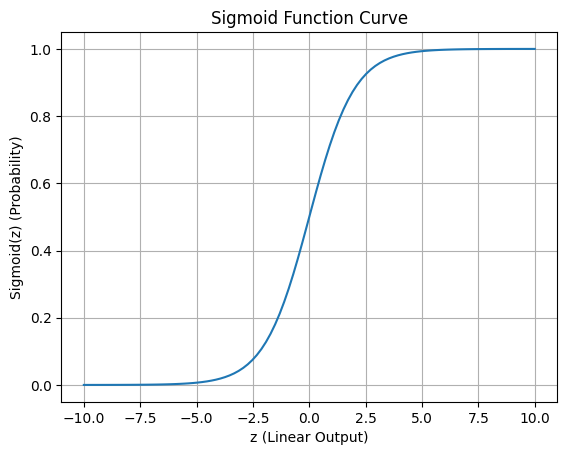

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Example values of z (linear combination output)
z_values = np.linspace(-10, 10, 100)

# Calculate sigmoid values for each z
sigmoid_values = sigmoid(z_values)

# Print some example outputs for select values of z
print("Sigmoid(0) =", sigmoid(0))      # 0.5
print("Sigmoid(5) =", sigmoid(5))      # ~0.993
print("Sigmoid(-5) =", sigmoid(-5))    # ~0.0067

# Plot the sigmoid curve
plt.plot(z_values, sigmoid_values)
plt.title("Sigmoid Function Curve")
plt.xlabel("z (Linear Output)")
plt.ylabel("Sigmoid(z) (Probability)")
plt.grid(True)
plt.show()

Question 3: What is Regularization in Logistic Regression and why is it needed?

Answer:

*   Regularization in Logistic Regression is a technique to prevent overfitting by adding a penalty term to the loss function during model training.

*   Why Regularization is needed:

    * Logistic Regression coefficients (weights) can become very large when the model fits training data too closely (overfitting).

    * Large coefficients make the model complex and reduce its ability to generalize well to new data.

    * Regularization controls this by penalizing large coefficients, encouraging simpler models.

*   How Regularization works:

    * It modifies the loss function by adding a penalty term multiplied by a regularization parameter lambda (λ).

    * The new objective to minimize is:
      Loss + λ * R(beta)

    * Common types of regularization are:

      L1 regularization (Lasso):
      R(beta) = sum(|beta_i|)

      L2 regularization (Ridge):
      R(beta) = (1/2) * sum(beta_i^2)

    * The parameter λ controls how strong the penalty is:

      Large λ means more penalty, shrinking coefficients toward zero (may cause underfitting)

      Small λ means less penalty, allowing coefficients to grow (may risk overfitting)

*   Below is the python example demonstrating Regularization in Logistic Regression using scikit-learn, showing how to apply L1 and L2 regularization:

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (important for regularization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression with L2 regularization (default)
model_l2 = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
model_l2.fit(X_train, y_train)
pred_l2 = model_l2.predict(X_test)
print("Accuracy with L2 regularization:", accuracy_score(y_test, pred_l2))

# Logistic Regression with L1 regularization
model_l1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', max_iter=1000)
model_l1.fit(X_train, y_train)
pred_l1 = model_l1.predict(X_test)
print("Accuracy with L1 regularization:", accuracy_score(y_test, pred_l1))

# Display some coefficients to see effect of regularization
print("L2 coefficients:", model_l2.coef_[0][:5])
print("L1 coefficients:", model_l1.coef_[0][:5])

print("""

Explanation:

penalty='l2' applies Ridge regularization, while penalty='l1' applies Lasso regularization.

The parameter C controls regularization strength (inverse scale). Smaller C means stronger regularization.

Standardizing features is important before applying regularization.

The example uses breast cancer dataset for binary classification.

Prints model accuracy on test data for both L1 and L2.

Outputs some coefficients to show how regularization affects model weights (L1 tends to sparsify coefficients).

""")

Accuracy with L2 regularization: 0.9824561403508771
Accuracy with L1 regularization: 0.9824561403508771
L2 coefficients: [-0.36619067 -0.36158121 -0.32048262 -0.41717824 -0.19220365]
L1 coefficients: [0. 0. 0. 0. 0.]


Explanation:

penalty='l2' applies Ridge regularization, while penalty='l1' applies Lasso regularization.

The parameter C controls regularization strength (inverse scale). Smaller C means stronger regularization.

Standardizing features is important before applying regularization.

The example uses breast cancer dataset for binary classification.

Prints model accuracy on test data for both L1 and L2.

Outputs some coefficients to show how regularization affects model weights (L1 tends to sparsify coefficients).




Question 4: What are some common evaluation metrics for classification models, and why are they important?

Answer:

*   Common evaluation metrics for classification models are crucial because they provide insights into how well the model performs, especially under different contexts such as balanced or imbalanced datasets. These metrics help measure correctness, errors, and trade-offs between different types of misclassifications.

*   Key Classification Evaluation Metrics:

    Accuracy:
    
    * Accuracy is the ratio of the number of correct predictions (both positive and negative) to the total predictions made.

    * Formula:
    
      Accuracy = (TP + TN) / (TP + TN + FP + FN)
      
      It is straightforward but can be misleading on imbalanced datasets (e.g., if one class is much larger than another).

    * Precision: Precision tells how many of the predicted positive cases were actually positive.

      Formula:

      Precision = TP / (TP + FP)
      Useful when the cost of false positives is high.

    * Recall (Sensitivity):
    
      Recall measures how many actual positive cases the model correctly identified.

      Formula:

      Recall = TP / (TP + FN)

      Important when missing positive cases has a high cost (false negatives).

    * F1 Score:
    
      The harmonic mean of Precision and Recall, balancing the two metrics.

      Formula:

      F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
      
      Useful when you want to balance precision and recall.

    * ROC Curve and AUC (Area Under the Curve):
    
      The ROC curve plots the true positive rate against the false positive rate at various threshold settings. AUC summarizes the curve into a single value representing model discrimination capability.

*   Why These Metrics Are Important

    * Accuracy may be too optimistic for imbalanced data; for example, predicting the majority class always achieves high accuracy but poor usefulness.

    * Precision helps when false positives are costly, and Recall helps when false negatives are costly.

    * F1 Score provides a single measure when you need a balance between precision and recall.

    * AUC-ROC gives a performance overview across all classification thresholds.

    * Choosing the right metric depends on the problem context, data balance, and costs of different errors.

    * This foundational understanding guides model selection, tuning, and decision-making in real-world classification tasks.

Question 5: Write a Python program that loads a CSV file into a Pandas DataFrame,
splits into train/test sets, trains a Logistic Regression model, and prints its accuracy.
(Use Dataset from sklearn package)

Answer:

In [11]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning

# Load dataset from sklearn
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Add target variable to DataFrame

# Split the DataFrame into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Suppress convergence warnings during model training
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    # Initialize and train the Logistic Regression model with max_iter=1000
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression model:", accuracy)


print("""

Explanation:

The breast cancer dataset is loaded from sklearn and converted into a Pandas DataFrame.

The dataset is split into features (X) and target (y).

Using train_test_split, 70% of the data is used for training and 30% for testing.

A Logistic Regression model is trained using the training set.

The model predicts labels for the test set.

Accuracy is calculated comparing predicted vs actual labels.

""")

Accuracy of Logistic Regression model: 0.9707602339181286


Explanation:

The breast cancer dataset is loaded from sklearn and converted into a Pandas DataFrame.

The dataset is split into features (X) and target (y).

Using train_test_split, 70% of the data is used for training and 30% for testing.

A Logistic Regression model is trained using the training set.

The model predicts labels for the test set.

Accuracy is calculated comparing predicted vs actual labels.




Question 6:  Write a Python program to train a Logistic Regression model using L2
regularization (Ridge) and print the model coefficients and accuracy.
(Use Dataset from sklearn package)

Answer:

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning

# Load dataset from sklearn
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Suppress convergence warnings (optional)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)

    # Create Logistic Regression model with L2 regularization (Ridge) and increased max_iter
    model = LogisticRegression(penalty='l2', max_iter=1000)
    model.fit(X_train, y_train)

# Get model coefficients
coefficients = model.coef_
print("Model Coefficients:\n", coefficients)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


print("""

Explanation:

The model uses 'penalty='l2' for Ridge regularization.

C=1.0 is the regularization strength (inverse regularization parameter). Smaller values mean stronger regularization.

The max_iter=1000 ensures enough iterations for convergence.

After training, coefficients are printed, showing the feature weights.

The accuracy on the test set helps evaluate model performance.

""")

Model Coefficients:
 [[ 2.14314843  0.21520964 -0.31493715  0.00892435 -0.25312017 -0.22953298
  -0.87600322 -0.68463721 -0.33732353  0.00324068 -0.23214171  1.38063351
   0.61838296 -0.1576031  -0.04346147  0.22679752  0.10464825 -0.07823463
  -0.04363574  0.03083968  0.52020356 -0.44945643 -0.08307888 -0.01284422
  -0.50476624 -0.15635753 -1.70991405 -1.07991958 -1.18680917  0.00843899]]
Model Accuracy: 0.9707602339181286


Explanation:

The model uses 'penalty='l2' for Ridge regularization.

C=1.0 is the regularization strength (inverse regularization parameter). Smaller values mean stronger regularization.

The max_iter=1000 ensures enough iterations for convergence.

After training, coefficients are printed, showing the feature weights.

The accuracy on the test set helps evaluate model performance.




Question 7: Write a Python program to train a Logistic Regression model for multiclass
classification using multi_class='ovr' and print the classification report.
(Use Dataset from sklearn package)

Answer:

In [13]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model with multi_class='ovr'
model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=data.target_names))

print("""

Explanation:

Uses the Iris dataset which has three classes (multiclass problem).

Splits dataset for training and testing.

The logistic regression is set with multi_class='ovr' (one-vs-rest strategy).

Uses solver='liblinear' which supports multiclass OVR efficiently.

Prints the detailed classification report including precision, recall, and F1-score for each class.

""")

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Explanation:

Uses the Iris dataset which has three classes (multiclass problem).

Splits dataset for training and testing.

The logistic regression is set with multi_class='ovr' (one-vs-rest strategy).

Uses solver='liblinear' which supports multiclass OVR efficiently.

Prints the detailed classification report including precision, recall, and F1-score for each class.




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Question 8: Write a Python program to apply GridSearchCV to tune C and penalty
hyperparameters for Logistic Regression and print the best parameters and validation
accuracy.
(Use Dataset from sklearn package)

Answer:

In [15]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Define a pipeline with scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='liblinear'))

# Define hyperparameter grid to search
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2']
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X, y)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

print("""

Explanation:

Uses a Pipeline to combine StandardScaler and LogisticRegression, essential since regularization benefits from
feature scaling.

param_grid specifies values for regularization strength C and penalty norms l1 & l2.

GridSearchCV exhaustively tests each parameter combination and uses 5-fold cross-validation to estimate validation
accuracy.

Outputs the set of hyperparameters yielding the best cross-validation accuracy.


""")

Best Parameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
Best Cross-Validation Accuracy: 0.9824406148113647


Explanation:

Uses a Pipeline to combine StandardScaler and LogisticRegression, essential since regularization benefits from 
feature scaling.

param_grid specifies values for regularization strength C and penalty norms l1 & l2.

GridSearchCV exhaustively tests each parameter combination and uses 5-fold cross-validation to estimate validation
accuracy.

Outputs the set of hyperparameters yielding the best cross-validation accuracy.





Question 9: Write a Python program to standardize the features before training Logistic
Regression and compare the model's accuracy with and without scaling.
(Use Dataset from sklearn package)

Answer:

In [16]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression WITHOUT scaling
model_raw = LogisticRegression(max_iter=1000, solver='liblinear')
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression WITH scaling
model_scaled = LogisticRegression(max_iter=1000, solver='liblinear')
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy without scaling: {accuracy_raw:.4f}")
print(f"Accuracy with scaling: {accuracy_scaled:.4f}")

print("""

Explanation:

First model trains on original data without feature scaling.

Second model trains on standardized data (zero mean, unit variance) using StandardScaler.

Scaling improves gradient-based optimization and can improve accuracy and convergence.

The printed accuracies help you compare impact of feature scaling on Logistic Regression performance.

""")

Accuracy without scaling: 0.9649
Accuracy with scaling: 0.9825


Explanation:

First model trains on original data without feature scaling.

Second model trains on standardized data (zero mean, unit variance) using StandardScaler.

Scaling improves gradient-based optimization and can improve accuracy and convergence.

The printed accuracies help you compare impact of feature scaling on Logistic Regression performance.




Question 10: Imagine you are working at an e-commerce company that wants to
predict which customers will respond to a marketing campaign. Given an imbalanced
dataset (only 5% of customers respond), describe the approach you’d take to build a
Logistic Regression model — including data handling, feature scaling, balancing
classes, hyperparameter tuning, and evaluating the model for this real-world business
use case.

Answer:

*   In building a Logistic Regression model for an imbalanced e-commerce marketing campaign dataset (5% responders), a careful approach is needed:

    Data Handling:

    * Start with data cleaning and preprocessing.

    * Separate features and the binary target (responded: yes/no).

    Feature Scaling:

    * Apply feature scaling (e.g., StandardScaler) as Logistic Regression benefits from standardized inputs for stable and faster convergence.

    Handling Class Imbalance:

    * Use class weighting in Logistic Regression (class_weight='balanced') to give more importance to minority class samples.

    * Alternatively, use resampling techniques:

      Oversampling the minority class (e.g., SMOTE) to synthetically generate minority class examples.

      Downsampling the majority class to reduce its dominance.

    * Combining resampling with class weighting can also be effective.

    Hyperparameter Tuning:

    * Use GridSearchCV to tune hyperparameters like regularization strength C, type of penalty (l1 or l2), and solver.

    * Include tuning whether to use class weights or not (class_weight parameter).

    * Use pipelines to combine scaling and model training for robust validation.

    Model Evaluation:

    Use evaluation metrics that reflect minority class performance such as:

    * Precision, Recall, and F1-score (especially recall if missing responders is costly).

    * ROC-AUC and Precision-Recall AUC, since accuracy can be misleading on imbalanced data.

    Use stratified cross-validation to maintain class distribution during training and validation.


    Example approach outline:

    * Load and preprocess data.

    * Split train/test set stratified by class.

    * Apply standard scaling.

    * Use LogisticRegression(class_weight='balanced', solver='liblinear').

    * Tune hyperparameters with GridSearchCV including class_weight.

    * Evaluate with AUC, precision, recall, and F1.

    * Consider adjusting decision threshold to improve business-relevant trade-offs.

*   This strategy helps build an unbiased, well-generalizing Logistic Regression model that pays attention to minority responders, essential for real-world marketing success.Below is the python code demonstration showing how to handle an imbalanced dataset (5% positive responses) for a marketing campaign prediction using Logistic Regression.

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress convergence warnings for cleaner output
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Step 1: Create an imbalanced dataset (5% positive class)
X, y = make_classification(n_samples=5000, n_features=20, n_informative=3,
                           n_redundant=2, n_classes=2, weights=[0.95, 0.05],
                           random_state=42)

# Step 2: Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
print("Original class distribution:", np.bincount(y_train))

# Step 3: Balance the dataset using SMOTE (oversampling minority class)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print("Balanced class distribution:", np.bincount(y_train_balanced))

# Step 4: Standardize features for better convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define Logistic Regression and hyperparameter grid
model = LogisticRegression(solver='liblinear')
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced']
}

# Step 6: Apply GridSearchCV for hyperparameter tuning
grid = GridSearchCV(model, param_grid, scoring='roc_auc', cv=5)
grid.fit(X_train_scaled, y_train_balanced)

# Step 7: Evaluate model performance
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)
y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]

print("\nBest Parameters:", grid.best_params_)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Original class distribution: [3308  192]
Balanced class distribution: [3308 3308]

Best Parameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l2'}
ROC-AUC Score: 0.925298427878496

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.93      1418
           1       0.29      0.83      0.43        82

    accuracy                           0.88      1500
   macro avg       0.64      0.86      0.68      1500
weighted avg       0.95      0.88      0.91      1500

Confusion Matrix:
 [[1255  163]
 [  14   68]]
